
# Program for International Students' Assesments (PISA) 2012

PISA is a survey for students on their skills and knowledge as they approach the end of their education. The survey aims to:

+	Examine how well students have learned the school curriculum
+	How prepared students are for life beyond school.

The PISA 2012 survey assessed the competencies of 15-year-olds in reading, mathematics and science. Sixty-five countries partook in this assessment. Some countries, 44 in total, opted for an optional assessment of creative problem-solving. Also, in 18 countries, the students were tested on financial literacy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

import warnings
warnings.filterwarnings("ignore")

In [2]:
with zipfile.ZipFile("pisa2012.csv.zip") as w:
    with w.open("pisa2012.csv") as file:
        data = pd.read_csv(file,encoding = 'latin')
        
data = data.drop(['Unnamed: 0'],1)
data.head()

,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,2,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,2,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,9,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,8,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,10,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


## Part 1 : Truancy - Background Information

Three major types of Truancy were identified and they are : 

+ Lateness to school
+ Skipping classes within school day
+ Skipping the whole school day

A score is attributed to each to gather the average truancy score of all students (100 - highest and 0-lowest).

Based on the score provided, the following questions are answered: 

+ Is there a difference in Truancy in children based on their parents' status?
+ Does Truancy influence grades?
+ Is there a difference in Truancy based on Gender?


In [28]:
data = pd.read_csv("200 columns.csv")
data.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,0,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,1,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,2,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,3,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,4,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [29]:
truancy = data[['ST08Q01', 'ST09Q01','ST115Q01','ST13Q01','ST15Q01','ST17Q01','ST19Q01']]
for i in truancy.columns:
    mode = truancy[i].mode()[0]
    truancy[i] = truancy[i].fillna(mode)

In [30]:
truancy = truancy.replace({'None':0, 'One or two times':1,'Three or four times':2,
                           'Five or more times':4,'She did not complete <ISCED level 1>': 'Incomplete <ISCED level 1>',
                          'He did not complete <ISCED level 1>':'Incomplete <ISCED level 1>'},regex=True)

In [31]:
truancy['ST115Q01'] = truancy['ST115Q01']
truancy_score = round((truancy['ST115Q01']+ truancy['ST09Q01'] + truancy['ST08Q01'])/12*100,1)
truancy['Score'] = truancy_score

### Is there a difference in Truancy in children based on their parents' status?

The visuals below provides evidence that the status of a parent (education and job/employment) has a significant effect on the truancy of their children in school.

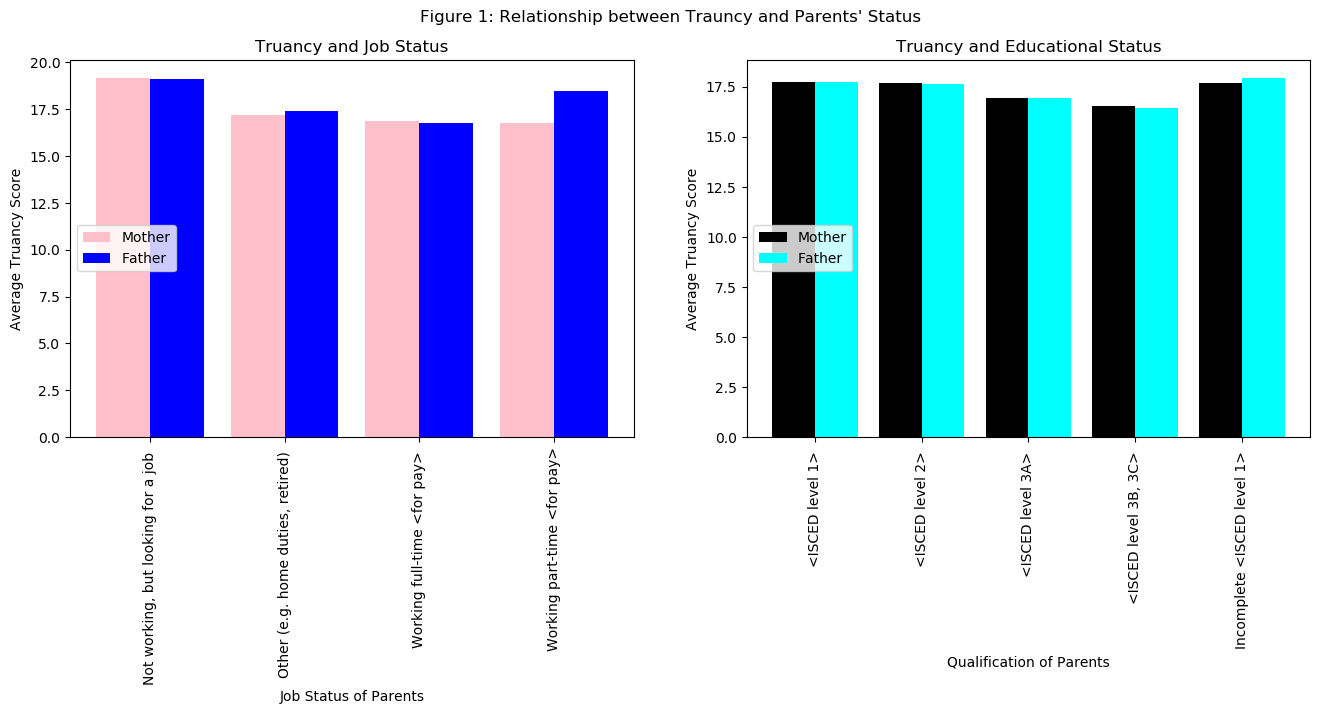

In [32]:
mother = truancy.groupby(['ST15Q01'])['Score'].mean()
father = truancy.groupby(['ST19Q01'])['Score'].mean()

mother2 = truancy.groupby(['ST13Q01'])['Score'].mean()
father2 = truancy.groupby(['ST17Q01'])['Score'].mean()

fig, ax = plt.subplots(1,2, figsize=(16,5), dpi = 100)

X = list(mother.index)
Y = list(father.index)
Xvalues = mother.values
Yvalues = father.values

X2 = list(mother2.index)
Y2 = list(father2.index)
Xvalues2 = mother2.values
Yvalues2 = father2.values


X_axis = np.arange(0,4)
ax[0].bar(X_axis - 0.2, Xvalues, 0.4, label = 'Mother', color='pink')
ax[0].bar(X_axis + 0.2, Yvalues, 0.4, label = 'Father',color='blue')
plt.sca(ax[0])
plt.xticks(X_axis, X, rotation=90)
ax[0].legend(loc=6)
  
ax[0].set_xlabel("Job Status of Parents")
ax[0].set_ylabel("Average Truancy Score")
ax[0].set_title("Truancy and Job Status")

X_axis2 = np.arange(0,5)
ax[1].bar(X_axis2 - 0.2, Xvalues2, 0.4, label = 'Mother', color='black')
ax[1].bar(X_axis2 + 0.2, Yvalues2, 0.4, label = 'Father',color='cyan')
plt.sca(ax[1])
plt.xticks(X_axis2, X2, rotation=90)
ax[1].legend(loc=6)
  
ax[1].set_xlabel("Qualification of Parents")
ax[1].set_ylabel("Average Truancy Score")
ax[1].set_title("Truancy and Educational Status")

plt.suptitle("Figure 1: Relationship between Trauncy and Parents' Status");

#### Observations

Based on the chart, the following can be inferred: 

+ Parents who are working full time have kids with a lower truancy score, the result is slightly lower for fathers who are working full time. 

+ While there is a low truancy score for mothers who are working part-time, the score is higher when fathers are working part-time

+ Unemployed parents have a negative influence on the truancy score of their children as this category has the highest average truancy score. 

+ Parents who did not complete their primary education (ISCED 1) tend to have children with the highest truancy score. The effect is more in fathers than in mothers

+ Truancy score tend to reduce as educational qualification increases. 

### Is there a difference in Truancy based on Gender?

The total truancy score is computed, as before, covering the 3 categories of truancy highlighted. There are some [claims](https://capmh.biomedcentral.com/articles/10.1186/1753-2000-1-15#:~:text=While%20we%20found%20that%20males,truancy%20among%20adolescents%20%5B13%5D) that young/teen males are more truant that their female counterparts and the visual below attempts to ascertain the claim. 


In [33]:
gender_grade = data[['ST04Q01','GRADE']]

In [34]:
gender_grade = gender_grade.replace({3.0:'Excellent',2.0:'Very Good',1.0:'Good',0.0:'Average',-1.0:'Below Average',
                     -2.0:'Poor',-3.0:'Very Poor'},regex=True)

In [35]:
male_grades = gender_grade[gender_grade['ST04Q01'] == 'Male']['GRADE'].value_counts([0]).index
male_values = gender_grade[gender_grade['ST04Q01'] == 'Male']['GRADE'].value_counts([0]).values

female_grades = gender_grade[gender_grade['ST04Q01'] == 'Female']['GRADE'].value_counts([0]).index
female_values = gender_grade[gender_grade['ST04Q01'] == 'Female']['GRADE'].value_counts([0]).values

In [36]:
def add_text_percent(chart_name, axvalue):
    '''
    
    This funcion collects the axis and chart name from user and adds text (percentage) to the specified bar charts
    
    '''
    for i in chart_name:
        height = i.get_height()
        axvalue.annotate('{}%'.format(round(height*100,3)),
        xy = (i.get_x() + i.get_width() /4, height),
        xytext = (0,2), textcoords = "offset points", ha='center')
        

def add_text_value(chart_name, axvalue):
    '''
    
    This funcion collects the axis and chart name from user and adds text (actual values) to the specified bar charts
    
    '''
    for i in chart_name:
        height = i.get_height()
        axvalue.annotate('{}'.format(round(height,2)),
        xy = (i.get_x() + i.get_width() /4, height),
        xytext = (0,2), textcoords = "offset points", ha='center')

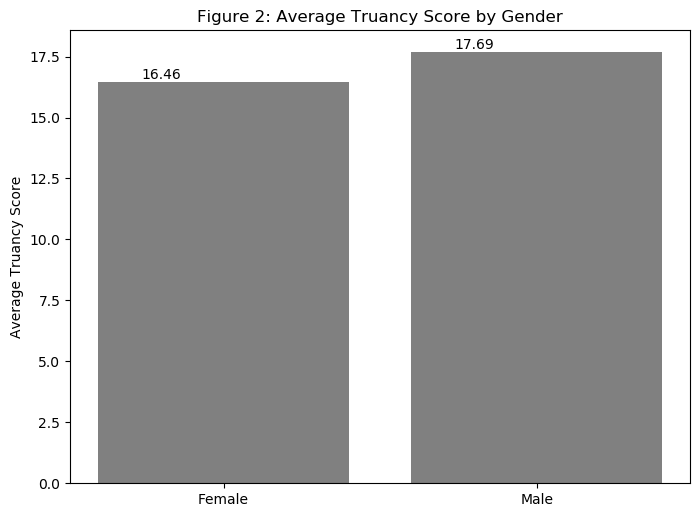

In [37]:
truancy['Gender'] = data['ST04Q01']
plt.figure(figsize=(8, 6), dpi=100)
x = truancy.groupby(['Gender'])['Score'].mean()

x_index = x.index
x_values = x.values

plota = plt.bar(x_index,x_values, color='grey')
add_text_value(plota,plt)

plt.ylabel("Average Truancy Score")
plt.title("Figure 2: Average Truancy Score by Gender");

#### Observation

The barchart in Figure 2 above confirms the claim that on average, young males are more truant that their female counterparts. The males had an average Truancy score of 17.69 while females had a truancy score of 16.46.

### Does Truancy Influence Grades?

There has been some [research](https://infonomics-society.org/wp-content/uploads/ijcdse/published-papers/special-issue-volume-3-2013/Truancy-and-Academic-Performance-of-Secondary-School-Students-in-Southwestern-Nigeria.pdf) attributing poor performance to high truancy rate. Hence, the relationship between these two variables have been explored visually. The test grades are recorded in a 7 point likert scale for each student. These grades are renamed as follows: 

+ 3.0 - Excellent
+ 2.0 - Very Good
+ 1.0 - Good
+ 0.0 - Average
+ -1.0 - Below Average
+ -2.0 - Poor
+ -3.0 - Very Poor

In [38]:
grade = gender_grade.GRADE
truancy['GRADE'] = grade
truancy_grade = truancy.groupby(['GRADE'])['Score'].mean().sort_values()

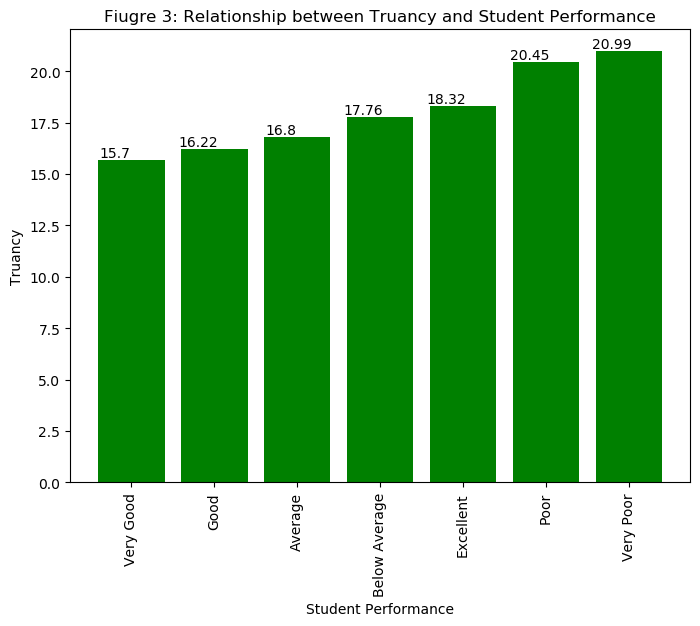

In [39]:
plt.figure(figsize=(8, 6), dpi=100)

plot = plt.bar(truancy_grade.index, truancy_grade.values, color='green')
add_text_value(plot,plt)

plt.title("Fiugre 3: Relationship between Truancy and Student Performance")
plt.xlabel("Student Performance")
plt.ylabel("Truancy")
plt.xticks(rotation=90)
plt.show()

#### Observations
+ Students with very poor grades have the highest truancy score
+ In general, grades tend to get better with lower truancy scores
+ Students with an 'Excellent' Grade have a higher truancy score than those with 'Below Average' : Upon exploration, it was discovered that only Male students got an 'Excellent' grade. Hence, this **may** be the cause of the higher truancy score. 

## Part 2 : Performance

Three major tests were taken on the following subjects to access students' performance in school: 
+ Reading
+ Math
+ Science

Based on this the following questions were asked and answered using visuals. 

+ Is there a relationship between the Math and Science scores of students?
+ Are there differences in reading scores based on some possesions?
+ Which countries are the top performers in the PISA 2012?

### Is there a relationship between the Math and Science scores of students?

Students were tested on Math, Reading and Science. Each math and science assesments had their sub-categories. The average of this was calculated for a unifying score. While it is popular opinion that students that do well in Math have a higher chance at doing well in Science, this [assumption](https://www.researchgate.net/publication/234707959_A_Comparative_Study_of_Relationship_between_Mathematics_and_Science_Achievement_at_the_8th_Grade) was tested using the scatterplot below. 

In [40]:
def sum_values (column):
    for i in range(len(column)):
        return(data[column[0]] + data[column[1]] + data[column[2]] + data[column[3]] + data[column[4]])

In [41]:
math = ['PV1MATH', 'PV2MATH','PV3MATH','PV4MATH','PV5MATH']
science = ['PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE']
change = ['PV1MACC','PV2MACC','PV3MACC','PV4MACC','PV5MACC']
quantity = ['PV1MACQ', 'PV2MACQ', 'PV3MACQ', 'PV4MACQ','PV5MACQ']
shape = ['PV1MACS','PV2MACS','PV3MACS','PV4MACS','PV5MACS']
uncertain = ['PV1MACU','PV2MACU','PV3MACU','PV4MACS','PV5MACS']
employ = ['PV1MAPE','PV2MAPE','PV3MAPE','PV4MAPE','PV5MAPE']
formulate = ['PV1MAPF','PV2MAPF','PV3MAPF','PV4MAPF','PV5MAPF'] 
interprete = ['PV1MAPI','PV2MAPI','PV3MAPI','PV4MAPI','PV5MAPI']

In [42]:
math_score = sum_values(math)
science_score = sum_values(science)
change_df = sum_values(change)
quantity_df = sum_values(quantity)
shape_df = sum_values(shape)
uncertain_df = sum_values(uncertain)
employ_df = sum_values(employ)
formulate_df = sum_values(formulate)
interprete_df = sum_values(interprete)

In [43]:
math_df=pd.DataFrame(change_df,columns=['Change'])
math_df['Quantity'] = quantity_df
math_df['Shape'] = shape_df
math_df['Uncertain'] = uncertain_df
math_df['Employ'] = employ_df
math_df['Formulate']=formulate_df
math_df['Interprete'] = interprete_df

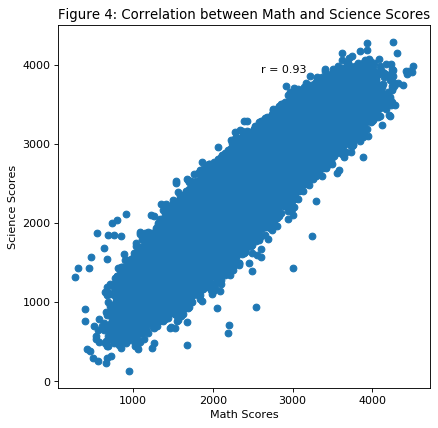

In [44]:
plt.figure(figsize=(6, 6), dpi=80)

plt.scatter(math_score, science_score)
plt.text(2600,3900,'r = {}'.format(round(math_score.corr(science_score),2)))
plt.xlabel("Math Scores")
plt.ylabel("Science Scores")
plt.title("Figure 4: Correlation between Math and Science Scores");

#### Observation

The scatterplot in Figure 4 above shows that there is a strong positive correlation between scores in Science and Mathematics (r = .98). Hence, a student with a high score in Mathematics would **most likely** have a high score in Science as well.

### Are there differences in reading scores based on some possesions?

The reading scores of students are examined based on some books they posses. The multiple bar chart in Figure 5 below aims to answer the question whether these possesions positively influences the reading scores of studnets. The reading scores were added and scaled (0 being the smallest and 100 being the highest).

The books examined here are: 

+ Literature
+ Poetry

In [45]:
possesion_reading = data[['PV1READ','PV2READ','PV3READ','PV4READ','PV5READ','ST26Q07','ST26Q08']]


values = possesion_reading['PV1READ'] + possesion_reading['PV2READ'] + possesion_reading['PV3READ'] + possesion_reading['PV4READ'] + possesion_reading['PV5READ']
values_pct = round(values/values.max()*100)
possesion_reading['Reading_Score'] = values_pct
possesion_reading.rename(columns = {'ST26Q07':'Literature', 'ST26Q08':'Poetry','ST26Q09':'Art','ST26Q10':'Textbooks'}, inplace = True)
possesion_reading = possesion_reading.drop(['PV1READ','PV2READ','PV3READ','PV4READ','PV5READ'],1)

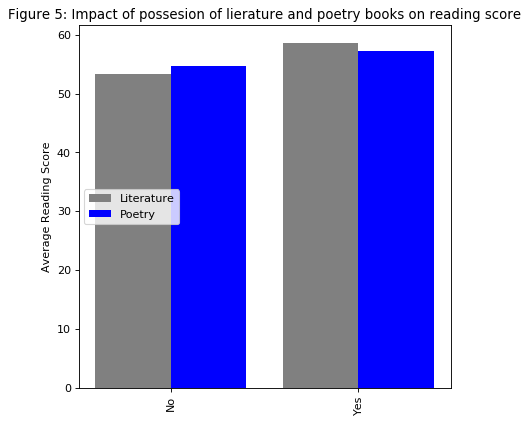

In [46]:
plt.figure(figsize=(6, 6), dpi=80)

lit = possesion_reading.groupby(['Literature'])['Reading_Score'].mean()
poet = possesion_reading.groupby(['Poetry'])['Reading_Score'].mean()

X = list(lit.index)
Y = list(poet.index)
Xvalues = lit.values
Yvalues = poet.values

X_axis = np.arange(0,2)
plt.bar(X_axis - 0.2, Xvalues, 0.4, label = 'lit', color='grey')
plt.bar(X_axis + 0.2, Yvalues, 0.4, label = 'poet',color='blue')
plt.xticks(X_axis, X, rotation=90)
plt.legend(['Literature','Poetry'],loc=6)
  
plt.ylabel("Average Reading Score")
plt.title("Figure 5: Impact of possesion of lierature and poetry books on reading score");

#### Observations
+ Most students get an average score (between 50% and 60%)
+ Students with the specified possesions performed better than those who don't.
+ Students who possess literature perform better than those who possess poetry books.

### Which countries are the top performers in the PISA 2012?
Over sixty countries were tested for the PISA 2012 on school performance and behaviours as well as their readiness for life after school. This question seeks to answer the countries with the highest average scores in each test: Reading, Mathematics and Science

In [47]:
country_scores_read = data[['PV1READ','PV2READ','PV3READ','PV4READ','PV5READ','CNT']]
country_scores_read['Total'] = (data['PV1READ'] + data['PV2READ'] + data['PV3READ'] + data['PV4READ'] + data['PV5READ'])/50
country_scores_read = country_scores_read.groupby('CNT').Total.mean().nlargest(5)

In [48]:
country_scores_math = data[['PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH','CNT']]
country_scores_math['Total'] = (data['PV1MATH'] + data['PV2MATH'] + data['PV3MATH'] + data['PV4MATH'] + data['PV5MATH'])/50
country_scores_math = country_scores_math.groupby('CNT').Total.mean().nlargest(5)

In [49]:
country_scores_science = data[['PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE','CNT']]
country_scores_science['Total'] = (data['PV1SCIE'] + data['PV2SCIE'] + data['PV3SCIE'] + data['PV4SCIE'] + data['PV5SCIE'])/50
country_scores_science = country_scores_science.groupby('CNT').Total.mean().nlargest(5)

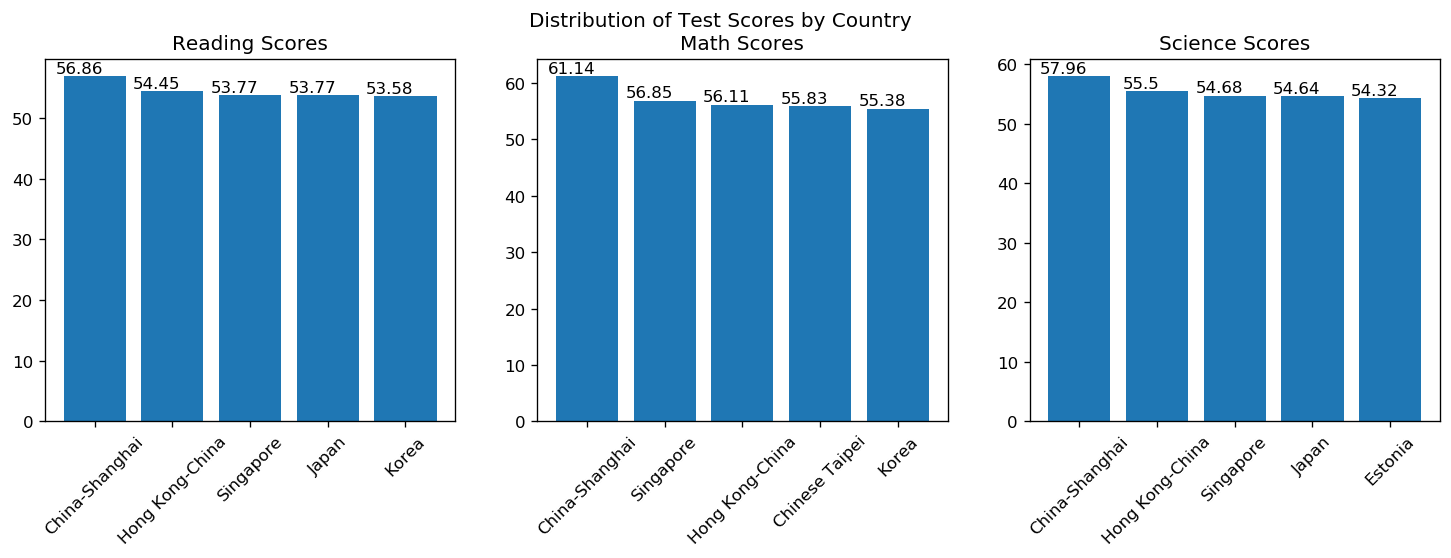

In [50]:
figure, ax = plt.subplots(1,3, figsize = (15,4), dpi=120)
plot_a = ax[0].bar(country_scores_read.index, country_scores_read.values)
plot_b = ax[1].bar(country_scores_math.index, country_scores_math.values)
plot_c = ax[2].bar(country_scores_science.index, country_scores_science.values)
ax[0].tick_params(axis='x', rotation = 45)
ax[1].tick_params(axis='x', rotation = 45)
ax[2].tick_params(axis='x', rotation = 45)

add_text_value(plot_a, ax[0])
add_text_value(plot_b, ax[1])
add_text_value(plot_c, ax[2])

ax[0].set_title("Reading Scores")
ax[1].set_title("Math Scores")
ax[2].set_title("Science Scores")

plt.suptitle("Distribution of Test Scores by Country")
plt.show()

#### Observations

+ Mexico has the highest population of students who took the PISA 2012 test, however the country was not featured as one of the top performers
+ China (Shanghai), China (Hong Kong) and Sigapore were in the top 5 performance across all tests (Reading , Math and Science)
+ Estonia was only included in the "Top 5s" in Science and not in Reading and Mathematics. 
+ China(Shanghai) is the overall top performing country with mathematics having the highest average score (61.14%)


In [52]:
!jupyter nbconvert Explanatory.ipynb --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook Explanatory.ipynb to slides
[NbConvertApp] Writing 534466 bytes to Explanatory.slides.html
